<a href="https://colab.research.google.com/github/MOHILMANDAPE15/github_first_year/blob/main/SEMANTIC_SEGMENTATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

# Upload the zipped folder
uploaded = files.upload()

# Extract the contents of the zip file
import zipfile
import os

for filename in uploaded.keys():
    with zipfile.ZipFile(filename, 'r') as zip_ref:
        zip_ref.extractall()
        print(f"Extracted: {filename}")

# List the extracted files
print(os.listdir())


In [ ]:
import tensorflow as tf
import os
import random
import numpy as np

from tqdm import tqdm

from skimage.io import imread, imshow
from skimage.transform import resize
import matplotlib.pyplot as plt

seed = 42
np.random.seed=seed

img_width=128
img_height=128
img_colours=3
train_path='/content/stage1_train.zip'
test_path='/content/stage1_test.zip'
with zipfile.ZipFile(train_path, 'r') as zip_ref:
    zip_ref.extractall('/content/stage1_train')

with zipfile.ZipFile(test_path, 'r') as zip_ref:
    zip_ref.extractall('/content/stage1_test')
train_path = '/content/stage1_train/'
test_path = '/content/stage1_test/'

train_ids=next(os.walk(train_path))[1]
test_ids=next(os.walk(test_path))[1]
x_train=np.zeros((len(train_ids),img_width,img_height,img_colours),dtype=np.uint8)
y_train=np.zeros((len(train_ids),img_width,img_height,1),dtype=bool)
for n,id_ in tqdm(enumerate(train_ids),total=len(train_ids)):
  path = os.path.join(train_path, id_)
  img=imread(os.path.join(path,'images', id_+'.png'))[:,:,:img_colours]
  img=resize(img,(128,128),mode='constant',preserve_range=True)
  x_train[n]=img
  mask=np.zeros((img_width,img_height,1),dtype=bool)
  for mask_file in next(os.walk(os.path.join(path, 'masks')))[2]:
    mask_=imread(os.path.join(path, 'masks', mask_file))
    mask_ = np.expand_dims(resize(mask_, (img_height, img_width), mode='constant',
                                      preserve_range=True), axis=-1)
    mask=np.maximum(mask_,mask)
  y_train[n]=mask


100%|██████████| 670/670 [06:07<00:00,  1.82it/s]


In [ ]:
x_test = np.zeros((len(test_ids), img_height,img_width,img_colours), dtype=np.uint8)
sizes_test = []
for n,id_ in tqdm(enumerate(test_ids),total=len(test_ids)):
  path = os.path.join(test_path, id_)
  img=imread(os.path.join(path,'images', id_+'.png'))[:,:,:img_colours]
  sizes_test.append([img.shape[0],img.shape[1]])
  img=resize(img,(128,128),mode='constant',preserve_range=True)
  x_test[n]=img

100%|██████████| 65/65 [00:01<00:00, 38.06it/s]


<ipython-input-9-cd66b1d9a3a0>:2: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(x_train[image_x])
/usr/local/lib/python3.10/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:158: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


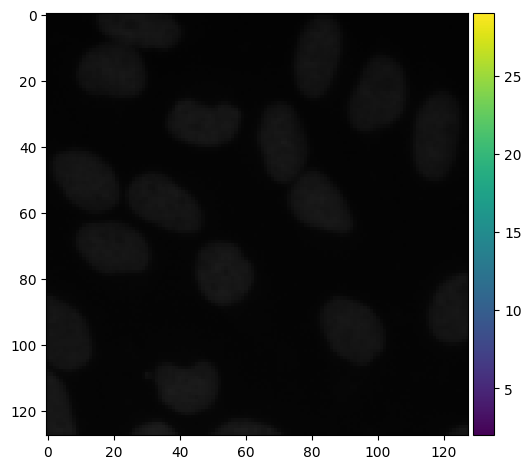

<ipython-input-9-cd66b1d9a3a0>:4: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(np.squeeze(y_train[image_x]))


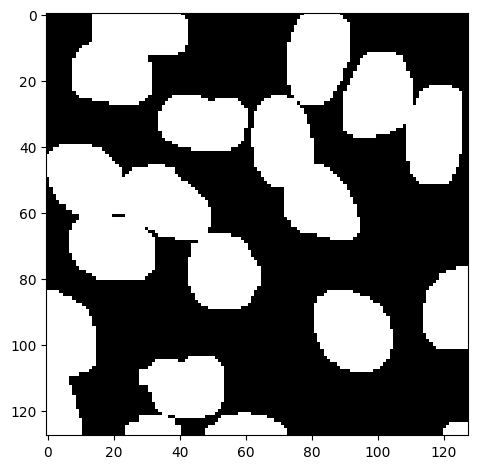

In [ ]:
image_x = random.randint(0, len(train_ids))
imshow(x_train[image_x])
plt.show()
imshow(np.squeeze(y_train[image_x]))
plt.show()

Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7530 - loss: 0.6458
Epoch 1: val_loss improved from inf to 0.39695, saving model to model-dsbowl2018-1.keras
36/36 ━━━━━━━━━━━━━━━━━━━━ 117s 3s/step - accuracy: 0.7530 - loss: 0.6438 - val_accuracy: 0.7492 - val_loss: 0.3970
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7512 - loss: 0.3656
Epoch 2: val_loss improved from 0.39695 to 0.32310, saving model to model-dsbowl2018-1.keras
36/36 ━━━━━━━━━━━━━━━━━━━━ 140s 3s/step - accuracy: 0.7519 - loss: 0.3650 - val_accuracy: 0.8107 - val_loss: 0.3231
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8781 - loss: 0.2733
Epoch 3: val_loss improved from 0.32310 to 0.20157, saving model to model-dsbowl2018-1.keras
36/36 ━━━━━━━━━━━━━━━━━━━━ 142s 3s/step - accuracy: 0.8786 - loss: 0.2727 - val_accuracy: 0.9221 - val_loss: 0.2016
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9254 - loss: 0.2017
Epoch 4: val_loss improved from 0.20157 to 0.

<ipython-input-15-3452e81de750>:62: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(x_train[ix])


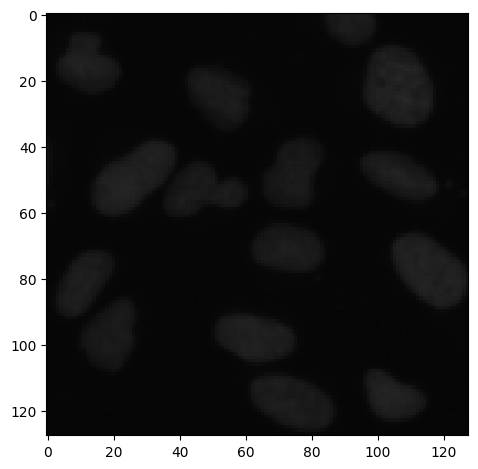

<ipython-input-15-3452e81de750>:64: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(np.squeeze(y_train[ix]))


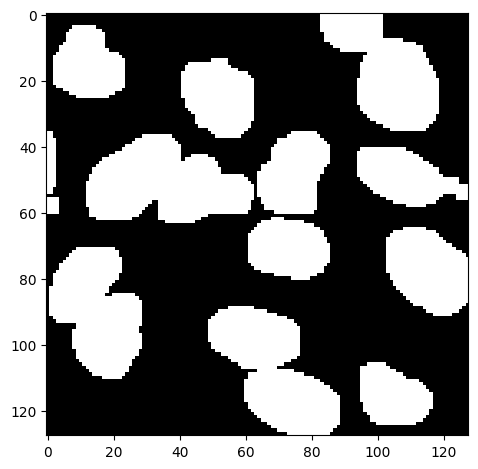

<ipython-input-15-3452e81de750>:66: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(np.squeeze(train_pred_t[ix]))
/usr/local/lib/python3.10/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:158: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


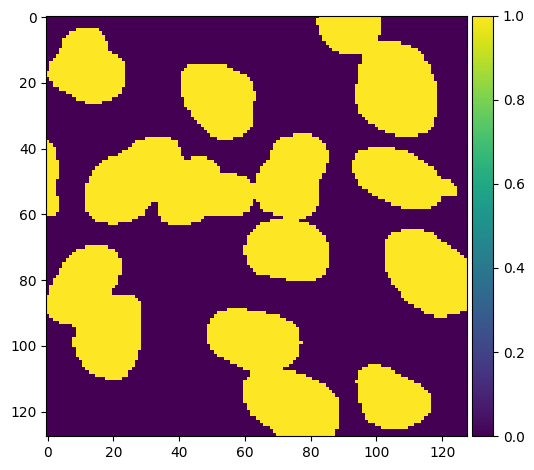

<ipython-input-15-3452e81de750>:70: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(x_train[int(x_train.shape[0]*0.9):][ix])


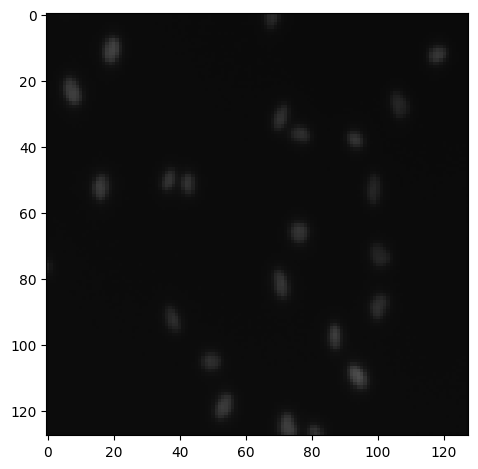

<ipython-input-15-3452e81de750>:72: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(np.squeeze(y_train[int(y_train.shape[0]*0.9):][ix]))


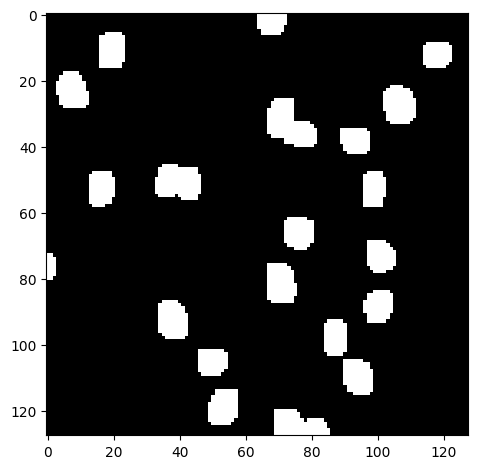

<ipython-input-15-3452e81de750>:74: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(np.squeeze(val_pred_t[ix]))
/usr/local/lib/python3.10/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:158: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


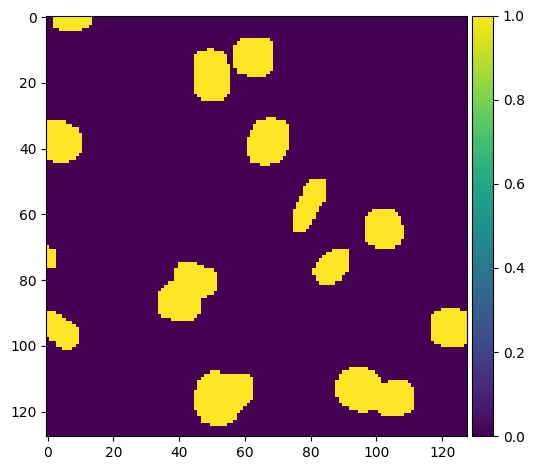

<ipython-input-15-3452e81de750>:78: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(x_train[int(x_train.shape[0]*0.9):][ix])


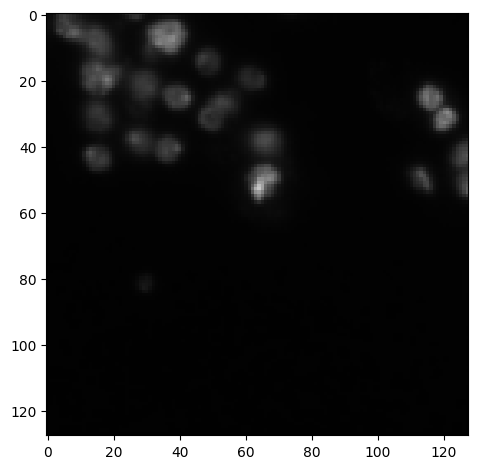

<ipython-input-15-3452e81de750>:80: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(np.squeeze(y_train[int(y_train.shape[0]*0.9):][ix]))


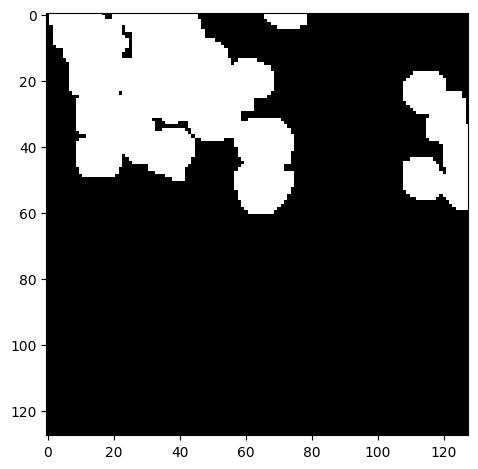

<ipython-input-15-3452e81de750>:82: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(np.squeeze(test_pred_t[ix]))
/usr/local/lib/python3.10/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:158: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


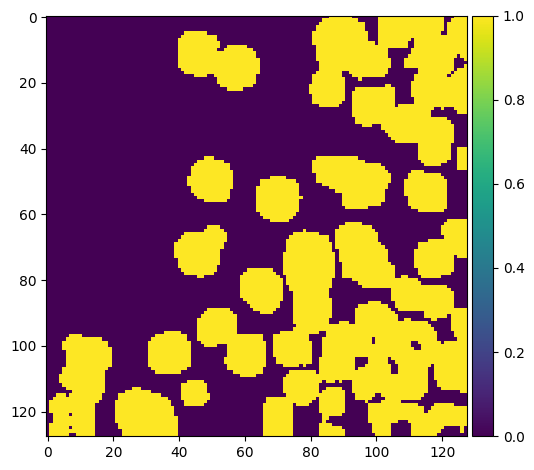

In [ ]:
input=tf.keras.layers.Input((img_width,img_height,img_colours))
s=tf.keras.layers.Lambda(lambda x:x/255)(input)
c1=tf.keras.layers.Conv2D(16,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(s)
c1=tf.keras.layers.Dropout(0.15)(c1)
c1=tf.keras.layers.Conv2D(16,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(c1)
p1=tf.keras.layers.MaxPooling2D((2,2))(c1)
c2=tf.keras.layers.Conv2D(32,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(p1)
c2=tf.keras.layers.Dropout(0.15)(c2)
c2=tf.keras.layers.Conv2D(32,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(c2)
p2=tf.keras.layers.MaxPooling2D((2,2))(c2)
c3=tf.keras.layers.Conv2D(128,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(p2)
c3=tf.keras.layers.Dropout(0.25)(c3)
c3=tf.keras.layers.Conv2D(128,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(c3)
p3=tf.keras.layers.MaxPooling2D((2,2))(c3)
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)
u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)

u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)

u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)

u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

output= tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)

model=tf.keras.Model(inputs=[input],outputs=[output])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

checkpointer=tf.keras.callbacks.ModelCheckpoint('model-dsbowl2018-1.keras',verbose=1,save_best_only=True)
callback_list=[tf.keras.callbacks.EarlyStopping(patience=3,monitor='val_loss'),tf.keras.callbacks.TensorBoard(log_dir='mohil_DL_PROJECT_logs'),checkpointer]
final_val=model.fit(x_train,y_train,validation_split=0.15,batch_size=16,epochs=50,callbacks=callback_list)
train_pred=model.predict(x_train[:int(x_train.shape[0]*0.85)],verbose=1)
val_pred=model.predict(x_train[int(x_train.shape[0]*0.85):],verbose=1)
test_pred=model.predict(x_test,verbose=1)

train_pred_t=(train_pred>0.5).astype(np.uint8)
val_pred_t=(val_pred>0.5).astype(np.uint8)
test_pred_t=(test_pred>0.5).astype(np.uint8)
ix = random.randint(0, len(train_pred_t))
imshow(x_train[ix])
plt.show()
imshow(np.squeeze(y_train[ix]))
plt.show()
imshow(np.squeeze(train_pred_t[ix]))
plt.show()

ix = random.randint(0, len(val_pred_t))
imshow(x_train[int(x_train.shape[0]*0.9):][ix])
plt.show()
imshow(np.squeeze(y_train[int(y_train.shape[0]*0.9):][ix]))
plt.show()
imshow(np.squeeze(val_pred_t[ix]))
plt.show()

ix = random.randint(0, len(test_pred_t))
imshow(x_train[int(x_train.shape[0]*0.9):][ix])
plt.show()
imshow(np.squeeze(y_train[int(y_train.shape[0]*0.9):][ix]))
plt.show()
imshow(np.squeeze(test_pred_t[ix]))
plt.show()

<ipython-input-16-afb224a9399c>:2: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(x_test[i])


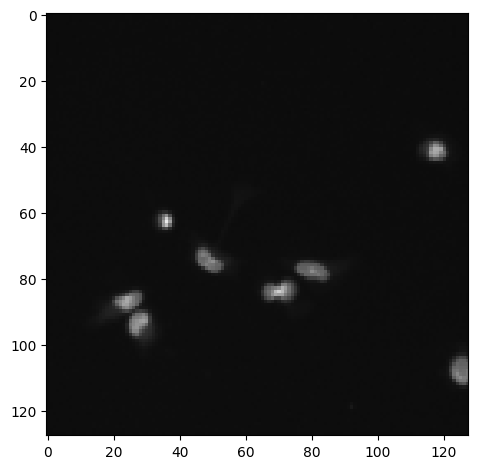

<ipython-input-16-afb224a9399c>:4: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(np.squeeze(test_pred_t[i]))
/usr/local/lib/python3.10/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:158: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


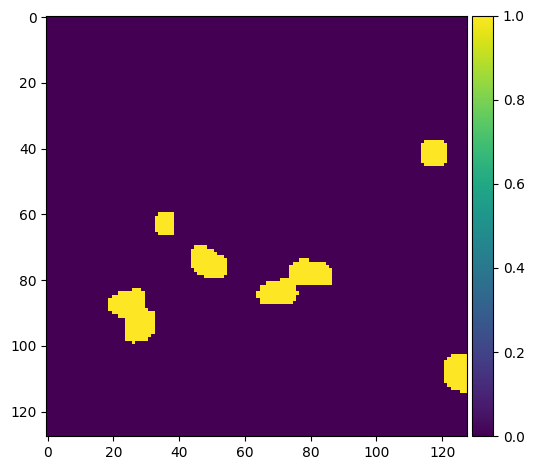

In [ ]:
i=random.randint(0,len(x_test))
imshow(x_test[i])
plt.show()
imshow(np.squeeze(test_pred_t[i]))
plt.show()


<ipython-input-17-afb224a9399c>:2: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(x_test[i])


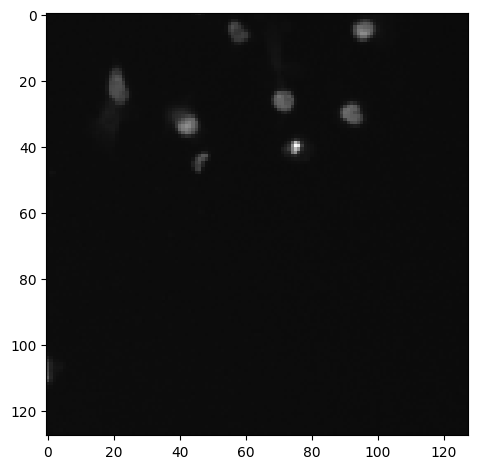

<ipython-input-17-afb224a9399c>:4: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(np.squeeze(test_pred_t[i]))
/usr/local/lib/python3.10/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:158: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


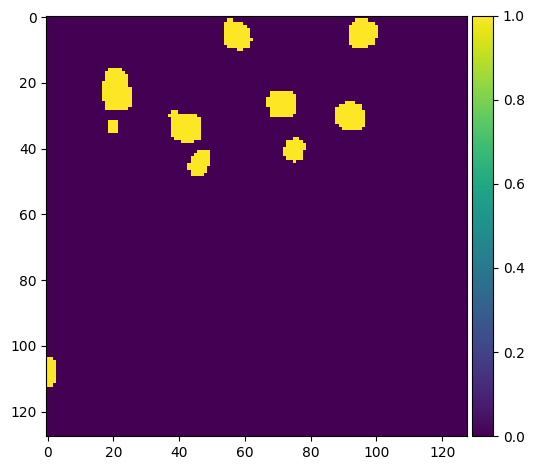

In [ ]:
i=random.randint(0,len(x_test))
imshow(x_test[i])
plt.show()
imshow(np.squeeze(test_pred_t[i]))
plt.show()


<ipython-input-18-afb224a9399c>:2: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(x_test[i])


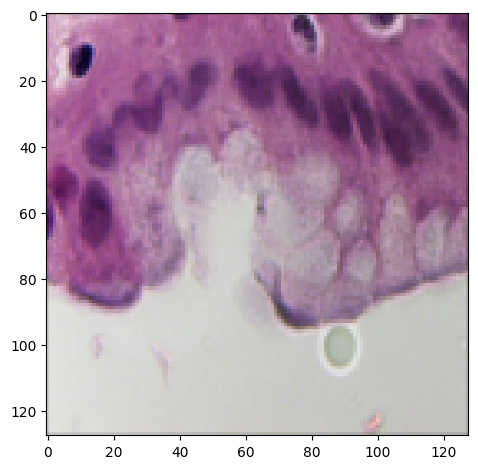

<ipython-input-18-afb224a9399c>:4: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(np.squeeze(test_pred_t[i]))
/usr/local/lib/python3.10/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:158: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


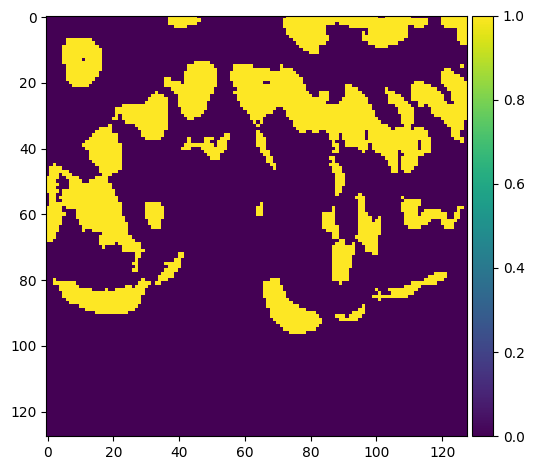

In [ ]:
i=random.randint(0,len(x_test))
imshow(x_test[i])
plt.show()
imshow(np.squeeze(test_pred_t[i]))
plt.show()


<ipython-input-19-afb224a9399c>:2: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(x_test[i])


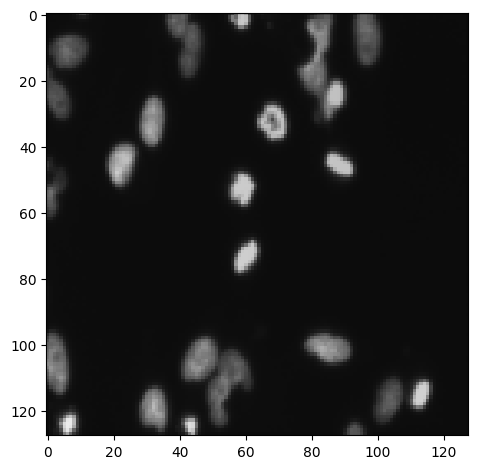

<ipython-input-19-afb224a9399c>:4: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(np.squeeze(test_pred_t[i]))
/usr/local/lib/python3.10/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:158: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


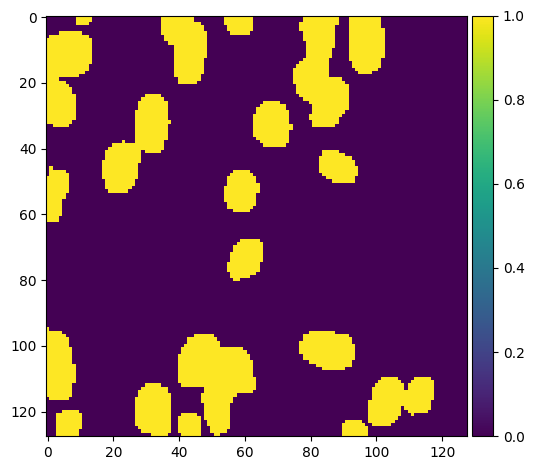

In [ ]:
i=random.randint(0,len(x_test))
imshow(x_test[i])
plt.show()
imshow(np.squeeze(test_pred_t[i]))
plt.show()


In [ ]:
log --

2025-01-04 11:43:32.261698: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-04 11:43:32.285136: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-04 11:43:32.292587: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-04 11:43:33.724027: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

TensorBoard 2.17.1 at http://localhost:8088/ (P